# 1) Data Processing

### 1.1) Import library and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
df = pd.read_excel('Career Mode player datasets - FIFA 15-22.xlsx', sheet_name = 'FIFA 22')

In [2]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

        lcb    cb   rcb    rb    gk  \
0      50+3  50+3  50+3  61+3  19+3   
1      60+3  60+3  60+3  61+3  19+3   
2      53+3  53+3  53+3  60+3  20+3   
3      50+3  50+3  50+3  62+3  20+3   
4      69+3  69+3  69+3  75+3  21+3   
...     ...   ...   ...   ...   ...   
19234  46+2  46+2  46+2  48+2  15+2   
19235  44+2  44+2  44+2  48+2  14+2   
19236  45+2  45+2  45+2  47+2  12+2   
19237  26+2  26+2  26+2  32+2  15+2   
19238  41+2  41+2  41+2  45+2  16+2   

                                         player_face_url  \
0      https://cdn.sofifa.net/players/158/023/22_120.png   
1      https://cdn.sofifa.net/players/188/545/22_120.png   
2      https://cdn.sofifa.net/players/020/801/22_120.png   
3      https://cdn.sofifa.net/players/190/871/22_120.png   
4      https://cdn.sofifa.net/players/192/985/22_120.png   
...                                                  ...   
19234  https://cdn.sofifa.net/players/261/962/22_120.png   
19235  https://cdn.sofifa.net/players/262/040/22_120.png   
19236  https://cdn.sofifa.net/players/262/760/22_120.png   
19237  https://cdn.sofifa.net/players/262/820/22_120.png   
19238  https://cdn.sofifa.net/players/264/540/22_120.png   

                                    club_logo_url  \
0          https://cdn.sofifa.net/teams/73/60.png   
1          https://cdn.sofifa.net/teams/21/60.png   
2          https://cdn.sofifa.net/teams/11/60.png   
3         

In [3]:
# Ckeck overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: datetime64[ns](2), float64(18), int64(44), object(46)
memory usage: 16.1+ MB


In [4]:
#Go through data fields
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

### 1.2) Data Cleaning

In [5]:
#Check null data and sort by descending
df.isnull().sum().sort_values(ascending = False)

nation_logo_url         18480
nation_team_id          18480
nation_position         18480
nation_jersey_number    18480
club_loaned_from        18137
                        ...  
skill_fk_accuracy           0
skill_curve                 0
skill_dribbling             0
attacking_volleys           0
nation_flag_url             0
Length: 110, dtype: int64

In [6]:
#Remove text fields and irrelated data
df.drop(df.columns[[0, 1, 3,4,10,14,15,18,19,20,22,23,24,25,26,31,32, 33,34, 35,36]], axis=1, inplace=True)
df

short_name  overall  potential    value_eur  wage_eur  age  \
0                L. Messi       93         93   78000000.0  320000.0   34   
1          R. Lewandowski       92         92  119500000.0  270000.0   32   
2       Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3               Neymar Jr       91         91  129000000.0  270000.0   29   
4            K. De Bruyne       91         91  125500000.0  350000.0   30   
...                   ...      ...        ...          ...       ...  ...   
19234           Song Defu       47         52      70000.0    1000.0   22   
19235           C. Porter       47         59     110000.0     500.0   19   
19236            N. Logue       47         55     100000.0     500.0   21   
19237           L. Rudden       47         60     110000.0     500.0   19   
19238  E. Lalchhanchhuaha       47         60     110000.0     500.0   19   

       height_cm  weight_kg  club_team_id  league_level  ...   lcb    cb  \
0            170         72          73.0           1.0  ...  50+3  50+3   
1            185         81          21.0           1.0  ...  60+3  60+3   
2            187         83          11.0           1.0  ...  53+3  53+3   
3            175         68          73.0           1.0  ...  50+3  50+3   
4            181         70          10.0           1.0  ...  69+3  69+3   
...          ...        ...           ...           ...  ...   ...   ...   
19234        180         64      112541.0           1.0  ...  46+2  46+2   
19235        175         70         445.0           1.0  ...  44+2  44+2   
19236        178         72      111131.0           1.0  ...  45+2  45+2   
19237        173         66      111131.0           1.0  ...  26+2  26+2   
19238        167         61      113040.0           1.0  ...  41+2  41+2   

        rcb    rb    gk                                    player_face_url  \
0      50+3  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1      60+3  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2      53+3  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3      50+3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4      69+3  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   
...     ...   ...   ...                                                ...   
19234  46+2  48+2  15+2  https://cdn.sofifa.net/players/261/962/22_120.png   
19235  44+2  48+2  14+2  https://cdn.sofifa.net/players/262/040/22_120.png   
19236  45+2  47+2  12+2  https://cdn.sofifa.net/players/262/760/22_120.png   
19237  26+2  32+2  15+2  https://cdn.sofifa.net/players/262/820/22_120.png   
19238  41+2  45+2  16+2  https://cdn.sofifa.net/players/264/540/22_120.png   

                                    club_logo_url  \
0          https://cdn.sofifa.net/teams/73/60.png   
1          https://cdn.sofifa.net/teams/21/60.png   
2          https://cdn.sofifa.net/teams/11/60.png   
3          https://cdn.sofifa.net/teams/73/60.png   
4          https://cdn.sofifa.net/teams/10/60.png   
...                                           ...   
19234  https://cdn.sofifa.net/teams/112541/60.png   
19235     https://cdn.sofifa.net/teams/445/60.png   
19236  https://cdn.sofifa.net/teams/111131/60.png   
19237  https://cdn.sofifa.net/teams/111131/60.png   
19238  https://cdn.sofifa.net/teams/113040/60.png   

                                 club_flag_url  \
0          https://cdn.sofifa.net/flags/fr.png   
1          https://cdn.sofifa.net/flags/de.png   
2      https://cdn.sofifa.net/flags/gb-eng.png   
3          https://cdn.sofifa.net/flags/fr.png   
4      https://cdn.sofifa.net/flags/gb-eng.png   
...                                        ...   
19234      https://cdn.sofifa.net/flags/cn.png   
19235      https://cdn.sofifa.net/flags/ie.png   
19236      https://cdn.sofifa.net/flags/ie.png   
19237      https://cdn.sofifa.net/flags/ie.png   
19238      https://cdn.sofifa.net/flags/in.png   

  

In [7]:
# Remove all columns between column name 'ls' to 'nation_flag_url' - texts or irrelated data
df1 = df.drop(df.loc[:, 'ls':'nation_flag_url'].columns, axis=1)
df1

short_name  overall  potential    value_eur  wage_eur  age  \
0                L. Messi       93         93   78000000.0  320000.0   34   
1          R. Lewandowski       92         92  119500000.0  270000.0   32   
2       Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3               Neymar Jr       91         91  129000000.0  270000.0   29   
4            K. De Bruyne       91         91  125500000.0  350000.0   30   
...                   ...      ...        ...          ...       ...  ...   
19234           Song Defu       47         52      70000.0    1000.0   22   
19235           C. Porter       47         59     110000.0     500.0   19   
19236            N. Logue       47         55     100000.0     500.0   21   
19237           L. Rudden       47         60     110000.0     500.0   19   
19238  E. Lalchhanchhuaha       47         60     110000.0     500.0   19   

       height_cm  weight_kg  club_team_id  league_level  ...  \
0            170         72          73.0           1.0  ...   
1            185         81          21.0           1.0  ...   
2            187         83          11.0           1.0  ...   
3            175         68          73.0           1.0  ...   
4            181         70          10.0           1.0  ...   
...          ...        ...           ...           ...  ...   
19234        180         64      112541.0           1.0  ...   
19235        175         70         445.0           1.0  ...   
19236        178         72      111131.0           1.0  ...   
19237        173         66      111131.0           1.0  ...   
19238        167         61      113040.0           1.0  ...   

      mentality_composure  defending_marking_awareness  \
0                      96                           20   
1                      88                           35   
2                      95                           24   
3                      93                           35   
4                      89                           68   
...                   ...                          ...   
19234                  37                           38   
19235                  47                           37   
19236                  36                           38   
19237                  47                           10   
19238                  36                           33   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                            35                        24                   6   
1                            42                        19                  15   
2                            32                        24                   7   
3                            32                        29                   9   
4                            65                        53                  15   
...                         ...                       ...                 ...   
19234                        43                        48                   6   
19235                        44                        47                  11   
19236                        44                        48                   8   
19237                        14                        11                   7   
19238                        31                        37                   8   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                        11                   15                       14   
1                         6                   12                        8   
2                        11                   15                       14   
3                         9                   15                       15   
4                        13                    5                       10   
...                     ...                  ...                      ...   
19234                    10                    5                       15   
19235                    12        

In [8]:
#Ceck null data
df1.isnull()

short_name  overall  potential  value_eur  wage_eur    age  height_cm  \
0           False    False      False      False     False  False      False   
1           False    False      False      False     False  False      False   
2           False    False      False      False     False  False      False   
3           False    False      False      False     False  False      False   
4           False    False      False      False     False  False      False   
...           ...      ...        ...        ...       ...    ...        ...   
19234       False    False      False      False     False  False      False   
19235       False    False      False      False     False  False      False   
19236       False    False      False      False     False  False      False   
19237       False    False      False      False     False  False      False   
19238       False    False      False      False     False  False      False   

       weight_kg  club_team_id  league_level  ...  mentality_composure  \
0          False         False         False  ...                False   
1          False         False         False  ...                False   
2          False         False         False  ...                False   
3          False         False         False  ...                False   
4          False         False         False  ...                False   
...          ...           ...           ...  ...                  ...   
19234      False         False         False  ...                False   
19235      False         False         False  ...                False   
19236      False         False         False  ...                False   
19237      False         False         False  ...                False   
19238      False         False         False  ...                False   

       defending_marking_awareness  defending_standing_tackle  \
0                            False                      False   
1                            False                      False   
2                            False                      False   
3                            False                      False   
4                            False                      False   
...                            ...                        ...   
19234                        False                      False   
19235                        False                      False   
19236                        False                      False   
19237                        False                      False   
19238                        False                      False   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                         False               False                 False   
1                         False               False                 False   
2                         False               False                 False   
3                         False               False                 False   
4                         False               False                 False   
...                         ...                 ...                   ...   
19234                     False               False                 False   
19235                     False               False                 False   
19236                     False               False                 False   
19237                     False               False                 False   
19238                     False               False                 False   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                    False                    False                 False   
1                    False                    False                 False   
2                    False                    False                 False   
3                    False                    False                 False   
4                    False                    False               

In [9]:
# Drop duplicate values
df1.drop_duplicates(subset = 'short_name',keep='first', inplace=True)
df1

short_name  overall  potential    value_eur  wage_eur  age  \
0                L. Messi       93         93   78000000.0  320000.0   34   
1          R. Lewandowski       92         92  119500000.0  270000.0   32   
2       Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3               Neymar Jr       91         91  129000000.0  270000.0   29   
4            K. De Bruyne       91         91  125500000.0  350000.0   30   
...                   ...      ...        ...          ...       ...  ...   
19233        R. Gallagher       47         61     110000.0     500.0   20   
19234           Song Defu       47         52      70000.0    1000.0   22   
19236            N. Logue       47         55     100000.0     500.0   21   
19237           L. Rudden       47         60     110000.0     500.0   19   
19238  E. Lalchhanchhuaha       47         60     110000.0     500.0   19   

       height_cm  weight_kg  club_team_id  league_level  ...  \
0            170         72          73.0           1.0  ...   
1            185         81          21.0           1.0  ...   
2            187         83          11.0           1.0  ...   
3            175         68          73.0           1.0  ...   
4            181         70          10.0           1.0  ...   
...          ...        ...           ...           ...  ...   
19233        180         74      111131.0           1.0  ...   
19234        180         64      112541.0           1.0  ...   
19236        178         72      111131.0           1.0  ...   
19237        173         66      111131.0           1.0  ...   
19238        167         61      113040.0           1.0  ...   

      mentality_composure  defending_marking_awareness  \
0                      96                           20   
1                      88                           35   
2                      95                           24   
3                      93                           35   
4                      89                           68   
...                   ...                          ...   
19233                  43                           37   
19234                  37                           38   
19236                  36                           38   
19237                  47                           10   
19238                  36                           33   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                            35                        24                   6   
1                            42                        19                  15   
2                            32                        24                   7   
3                            32                        29                   9   
4                            65                        53                  15   
...                         ...                       ...                 ...   
19233                        31                        29                  14   
19234                        43                        48                   6   
19236                        44                        48                   8   
19237                        14                        11                   7   
19238                        31                        37                   8   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                        11                   15                       14   
1                         6                   12                        8   
2                        11                   15                       14   
3                         9                   15                       15   
4                        13                    5                       10   
...                     ...                  ...                      ...   
19233                    10                    7                       13   
19234                    10        

Handling missing rows Delete the rows where all values are missing from highest null amount to lowest amount

In [10]:
# Reset the indexes
df2 = df1.reset_index(drop = True)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18145 entries, 0 to 18144
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   18145 non-null  object 
 1   overall                      18145 non-null  int64  
 2   potential                    18145 non-null  int64  
 3   value_eur                    18073 non-null  float64
 4   wage_eur                     18085 non-null  float64
 5   age                          18145 non-null  int64  
 6   height_cm                    18145 non-null  int64  
 7   weight_kg                    18145 non-null  int64  
 8   club_team_id                 18085 non-null  float64
 9   league_level                 18085 non-null  float64
 10  club_position                18085 non-null  object 
 11  club_contract_valid_until    18085 non-null  float64
 12  preferred_foot               18145 non-null  object 
 13  weak_foot       

In [12]:
#Consider to drop 'goalkeeping_speed', which has the biggest null data (16,138 rows) and other goalkeeping variables
print(df2['goalkeeping_speed'].value_counts())

42.0    75
44.0    75
24.0    72
33.0    68
25.0    67
26.0    66
45.0    66
43.0    65
41.0    65
27.0    64
30.0    63
46.0    62
28.0    61
36.0    60
40.0    58
31.0    56
47.0    56
23.0    55
34.0    52
32.0    52
29.0    50
37.0    50
22.0    47
39.0    44
48.0    43
49.0    43
38.0    41
35.0    39
51.0    39
50.0    38
20.0    35
21.0    33
19.0    28
52.0    25
53.0    25
55.0    21
54.0    20
56.0    19
18.0    18
57.0    17
17.0    17
58.0    14
59.0    12
15.0     7
16.0     5
61.0     5
60.0     4
65.0     3
64.0     3
63.0     2
62.0     2
Name: goalkeeping_speed, dtype: int64


==> Not drop goalkeeping_speed at this time

In [13]:
#Check null values again
df2.isnull().sum().sort_values(ascending = False)

goalkeeping_speed              16138
pace                            2007
physic                          2007
defending                       2007
dribbling                       2007
passing                         2007
shooting                        2007
value_eur                         72
league_level                      60
club_position                     60
club_contract_valid_until         60
wage_eur                          60
club_team_id                      60
mentality_penalties                0
power_shot_power                   0
power_jumping                      0
power_stamina                      0
power_strength                     0
power_long_shots                   0
mentality_aggression               0
mentality_interceptions            0
mentality_positioning              0
mentality_vision                   0
goalkeeping_handling               0
mentality_composure                0
goalkeeping_reflexes               0
goalkeeping_positioning            0
m

In [14]:
#Drop the large second null group, 6 variables has the same 2007 null data, 
# assume drop one of them, all groups would be dropped.
df2 = df2.dropna(subset=['shooting'])

In [15]:
# 6 variables are automatically dropped
df2.isnull().sum().sort_values(ascending = False)

goalkeeping_speed              16138
value_eur                         64
club_team_id                      52
club_contract_valid_until         52
club_position                     52
league_level                      52
wage_eur                          52
movement_balance                   0
power_shot_power                   0
movement_reactions                 0
mentality_positioning              0
movement_agility                   0
power_jumping                      0
power_stamina                      0
power_strength                     0
power_long_shots                   0
mentality_aggression               0
mentality_interceptions            0
defending_marking_awareness        0
mentality_vision                   0
mentality_penalties                0
mentality_composure                0
movement_acceleration              0
defending_standing_tackle          0
defending_sliding_tackle           0
goalkeeping_diving                 0
goalkeeping_handling               0
g

In [16]:
#Drop the last groups
df2 = df2.dropna(subset=['club_contract_valid_until'])
df2 = df2.dropna(subset=['value_eur'])
df2 = df2.drop('goalkeeping_speed', axis = 1)
df2 = df2.drop('potential', axis = 1)
df2 = df2.drop('value_eur', axis = 1)
df2.isnull().sum().sort_values(ascending = False)
#At this time 16k null 'goalkeeping_speed' automatically dropped

short_name                     0
mentality_aggression           0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_interceptions        0
overall                        0
mentality_positioning          0
mentality_vision               0
mentality_penalties            0
mentality_composure            0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
goalkeeping_diving             0
goalkeeping_handling           0
goalkeeping_kicking            0
goalkeeping_positioning        0
skill_long_passing             0
skill_fk_accuracy              0
skill_curve                    0
skill_dribbling                0
wage_eur  

In [17]:
#Check data type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16074 entries, 0 to 18144
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   16074 non-null  object 
 1   overall                      16074 non-null  int64  
 2   wage_eur                     16074 non-null  float64
 3   age                          16074 non-null  int64  
 4   height_cm                    16074 non-null  int64  
 5   weight_kg                    16074 non-null  int64  
 6   club_team_id                 16074 non-null  float64
 7   league_level                 16074 non-null  float64
 8   club_position                16074 non-null  object 
 9   club_contract_valid_until    16074 non-null  float64
 10  preferred_foot               16074 non-null  object 
 11  weak_foot                    16074 non-null  int64  
 12  skill_moves                  16074 non-null  int64  
 13  international_re

In [18]:
#get dummy values of club_position
club_pos = pd.get_dummies(df2['club_position'],prefix = 'club_pos',drop_first = True)
df2 = df2.rename(mapper=lambda x: x.replace('-', '_'), axis=1)
df2 = df2.join(club_pos)
df2 = df2.drop('club_position', axis = 1)

#get dummy values of preferred_foot
pre_foot = pd.get_dummies(df2['preferred_foot'],prefix = 'preferred_foot',drop_first = True)
df2 = df2.rename(mapper=lambda x: x.replace('-', '_'), axis=1)
df2 = df2.join(pre_foot)
df2 = df2.drop('preferred_foot', axis = 1)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16074 entries, 0 to 18144
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   16074 non-null  object 
 1   overall                      16074 non-null  int64  
 2   wage_eur                     16074 non-null  float64
 3   age                          16074 non-null  int64  
 4   height_cm                    16074 non-null  int64  
 5   weight_kg                    16074 non-null  int64  
 6   club_team_id                 16074 non-null  float64
 7   league_level                 16074 non-null  float64
 8   club_contract_valid_until    16074 non-null  float64
 9   weak_foot                    16074 non-null  int64  
 10  skill_moves                  16074 non-null  int64  
 11  international_reputation     16074 non-null  int64  
 12  pace                         16074 non-null  float64
 13  shooting        

In [20]:
# plot some thing for club position

In [21]:
df3 = df2.drop('short_name', axis = 1)

In [22]:
df3.describe()

overall       wage_eur           age     height_cm     weight_kg  \
count  16074.000000   16074.000000  16074.000000  16074.000000  16074.000000   
mean      66.123243    9687.243374     25.130895    180.476795     74.176807   
std        6.782261   20346.303352      4.598525      6.527325      6.703113   
min       47.000000     500.000000     16.000000    156.000000     49.000000   
25%       62.000000    1000.000000     21.000000    176.000000     70.000000   
50%       66.000000    3000.000000     25.000000    180.000000     74.000000   
75%       71.000000    9000.000000     29.000000    185.000000     79.000000   
max       93.000000  350000.000000     39.000000    203.000000    110.000000   

        club_team_id  league_level  club_contract_valid_until     weak_foot  \
count   16074.000000  16074.000000               16074.000000  16074.000000   
mean    49717.136369      1.350317                2022.786923      3.007963   
std     54313.536676      0.737675                   1.214023      0.652204   
min         1.000000      1.000000                2021.000000      1.000000   
25%       463.000000      1.000000                2022.000000      3.000000   
50%      1929.000000      1.000000                2023.000000      3.000000   
75%    111092.000000      1.000000                2024.000000      3.000000   
max    115820.000000      5.000000                2031.000000      5.000000   

        skill_moves  ...  club_pos_RDM  club_pos_RES   club_pos_RF  \
count  16074.000000  ...  16074.000000  16074.000000  16074.000000   
mean       2.528244  ...      0.012691      0.153478      0.002053   
std        0.640009  ...      0.111942      0.360459      0.045265   
min        2.000000  ...      0.000000      0.000000      0.000000   
25%        2.000000  ...      0.000000      0.000000      0.000000   
50%        2.000000  ...      0.000000      0.000000      0.000000   
75%        3.000000  ...      0.000000      0.000000      0.000000   
max        5.000000  ...      1.000000      1.000000      1.000000   

        club_pos_RM  club_pos_RS   club_pos_RW  club_pos_RWB   club_pos_ST  \
count  16074.000000  16074.00000  16074.000000  16074.000000  16074.000000   
mean       0.024201      0.01294      0.010949      0.006595      0.028244   
std        0.153676      0.11302      0.104068      0.080941      0.165675   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%        0.000000      0.00000      0.000000      0.000000      0.000000   
50%        0.000000      0.00000      0.000000      0.000000      0.000000   
75%        0.000000      0.00000      0.000000      0.000000      0.000000   
max        1.000000      1.00000      1.000000      1.000000      1.000000   

       club_pos_SUB  preferred_foot_Right  
count  16074.000000          16074.000000  
mean       0.431940              0.746858  
std        0.495362              0.434825  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              1.000000  
75%        1.000000              1.000000  
max        1.000000              1.000000  

[8 rows x 79 columns]

In [23]:
#Get correlation coeeficient of club position with wage
(df3.corr().loc[:,"club_pos_CB":"club_pos_SUB"]).iloc[1]

club_pos_CB    -0.000349
club_pos_CDM    0.033902
club_pos_CF     0.083420
club_pos_CM     0.002641
club_pos_LAM    0.004323
club_pos_LB     0.015441
club_pos_LCB    0.013572
club_pos_LCM    0.021638
club_pos_LDM    0.019322
club_pos_LF     0.003818
club_pos_LM     0.015487
club_pos_LS     0.019954
club_pos_LW     0.046625
club_pos_LWB   -0.006849
club_pos_RAM    0.004876
club_pos_RB     0.012379
club_pos_RCB    0.014035
club_pos_RCM    0.023647
club_pos_RDM    0.020815
club_pos_RES   -0.104735
club_pos_RF     0.011043
club_pos_RM     0.016558
club_pos_RS     0.015591
club_pos_RW     0.042078
club_pos_RWB   -0.000873
club_pos_ST     0.057207
club_pos_SUB   -0.044700
Name: wage_eur, dtype: float64

## 1.2) Heatmap

### Initial Heatmap

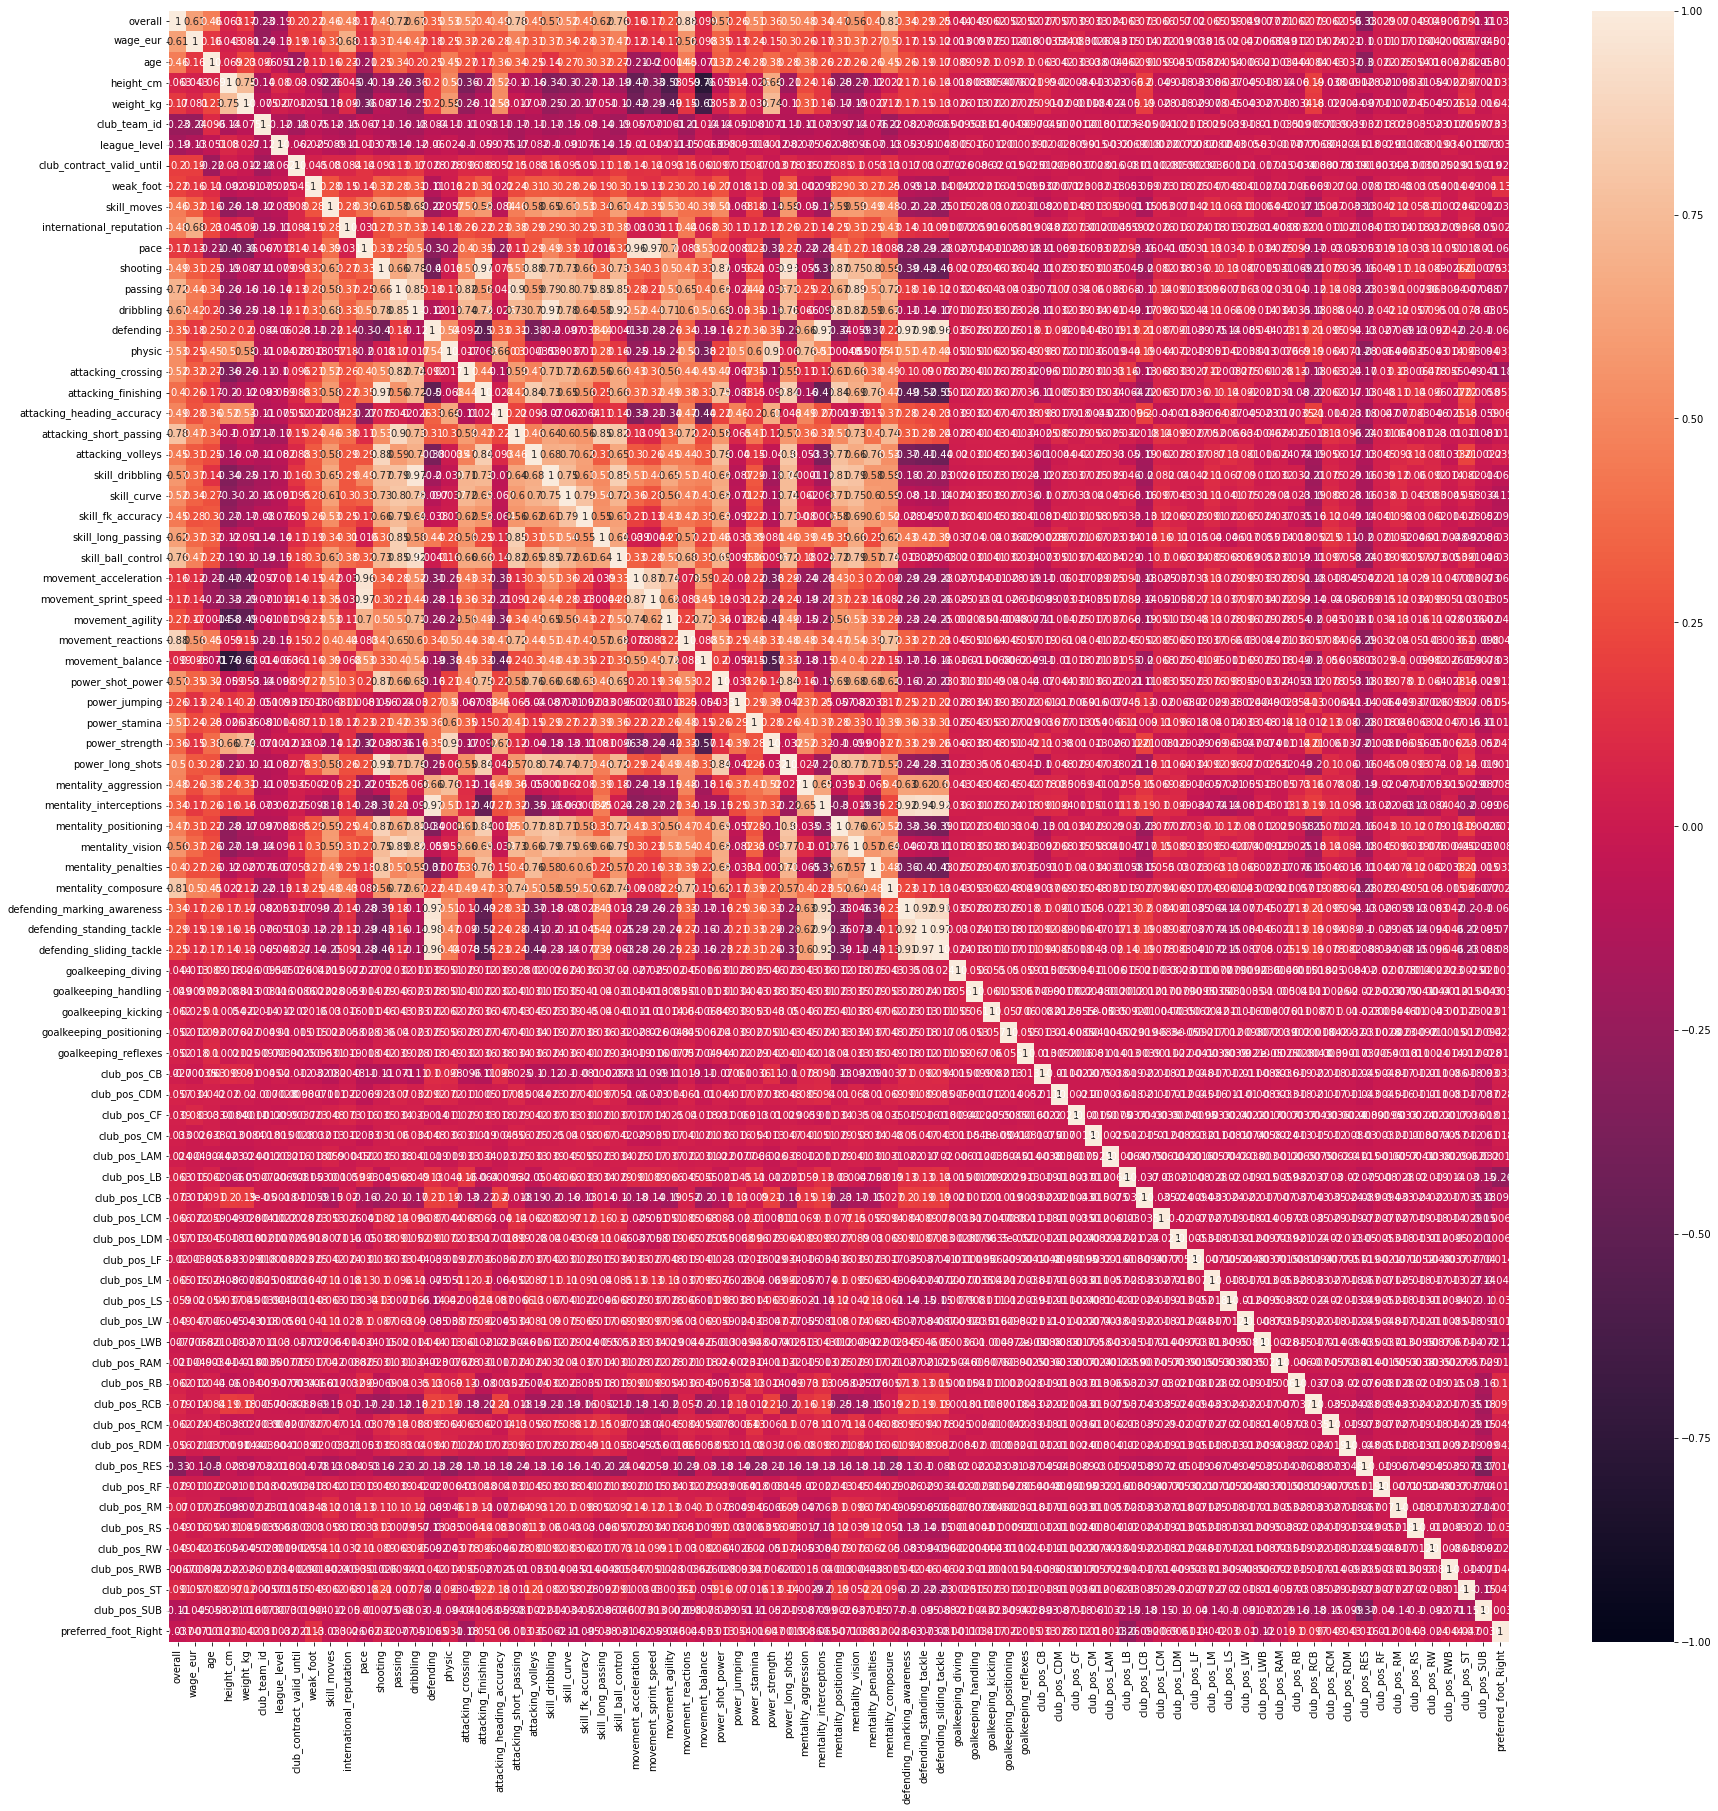

In [24]:
plt.figure(figsize=(30,30))
sns.heatmap(df3.corr(), vmin=-1, annot = True);

==> Club position and goal keaping skill seemingly do not have iipacts on wage or overal score

In [25]:
#Drop those columns les important from initial heatmap
df3 = df3.drop(df3.loc[:, 'goalkeeping_diving':'club_pos_SUB'].columns, axis=1)
df3

overall  wage_eur  age  height_cm  weight_kg  club_team_id  \
0           93  320000.0   34        170         72          73.0   
1           92  270000.0   32        185         81          21.0   
2           91  270000.0   36        187         83          11.0   
3           91  270000.0   29        175         68          73.0   
4           91  350000.0   30        181         70          10.0   
...        ...       ...  ...        ...        ...           ...   
18140       47     500.0   20        180         74      111131.0   
18141       47    1000.0   22        180         64      112541.0   
18142       47     500.0   21        178         72      111131.0   
18143       47     500.0   19        173         66      111131.0   
18144       47     500.0   19        167         61      113040.0   

       league_level  club_contract_valid_until  weak_foot  skill_moves  ...  \
0               1.0                     2023.0          4            4  ...   
1               1.0                     2023.0          4            4  ...   
2               1.0                     2023.0          4            5  ...   
3               1.0                     2025.0          5            5  ...   
4               1.0                     2025.0          5            4  ...   
...             ...                        ...        ...          ...  ...   
18140           1.0                     2021.0          3            2  ...   
18141           1.0                     2021.0          3            2  ...   
18142           1.0                     2021.0          3            2  ...   
18143           1.0                     2021.0          3            2  ...   
18144           1.0                     2025.0          3            2  ...   

       mentality_aggression  mentality_interceptions  mentality_positioning  \
0                        44                       40                     93   
1                        81                       49                     95   
2                        63                       29                     95   
3                        63                       37                     86   
4                        76                       66                     88   
...                     ...                      ...                    ...   
18140                    47                       32                     49   
18141                    52                       42                     38   
18142                    51                       38                     45   
18143                    34                       14                     47   
18144                    55                       42                     47   

       mentality_vision  mentality_penalties  mentality_composure  \
0                    95                   75                   96   
1                    81                   90                   88   
2                    76                   88                   95   
3                    90                   93                   93   
4                    94                   83                   89   
...                 ...                  ...                  ...   
18140                47                   32                   43   
18141                43                   42                   37   
18142                46                   39                   36   
18143                40                   49                   47   
18144                46                   35                   36   

       defending_marking_awareness  defending_standing_tackle  \
0                               20                         35   
1                               35                         42   
2                               24                         32   
3                               35                         32   
4                               68                         65   
...                            ...                        ...

In [26]:
df3.columns

Index(['overall', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'league_level', 'club_contract_valid_until', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
      

In [27]:
#Export to ecel to use latter
df3.to_excel("clean_fifa_47_columns.xlsx")

### Heatmap after reducing variables

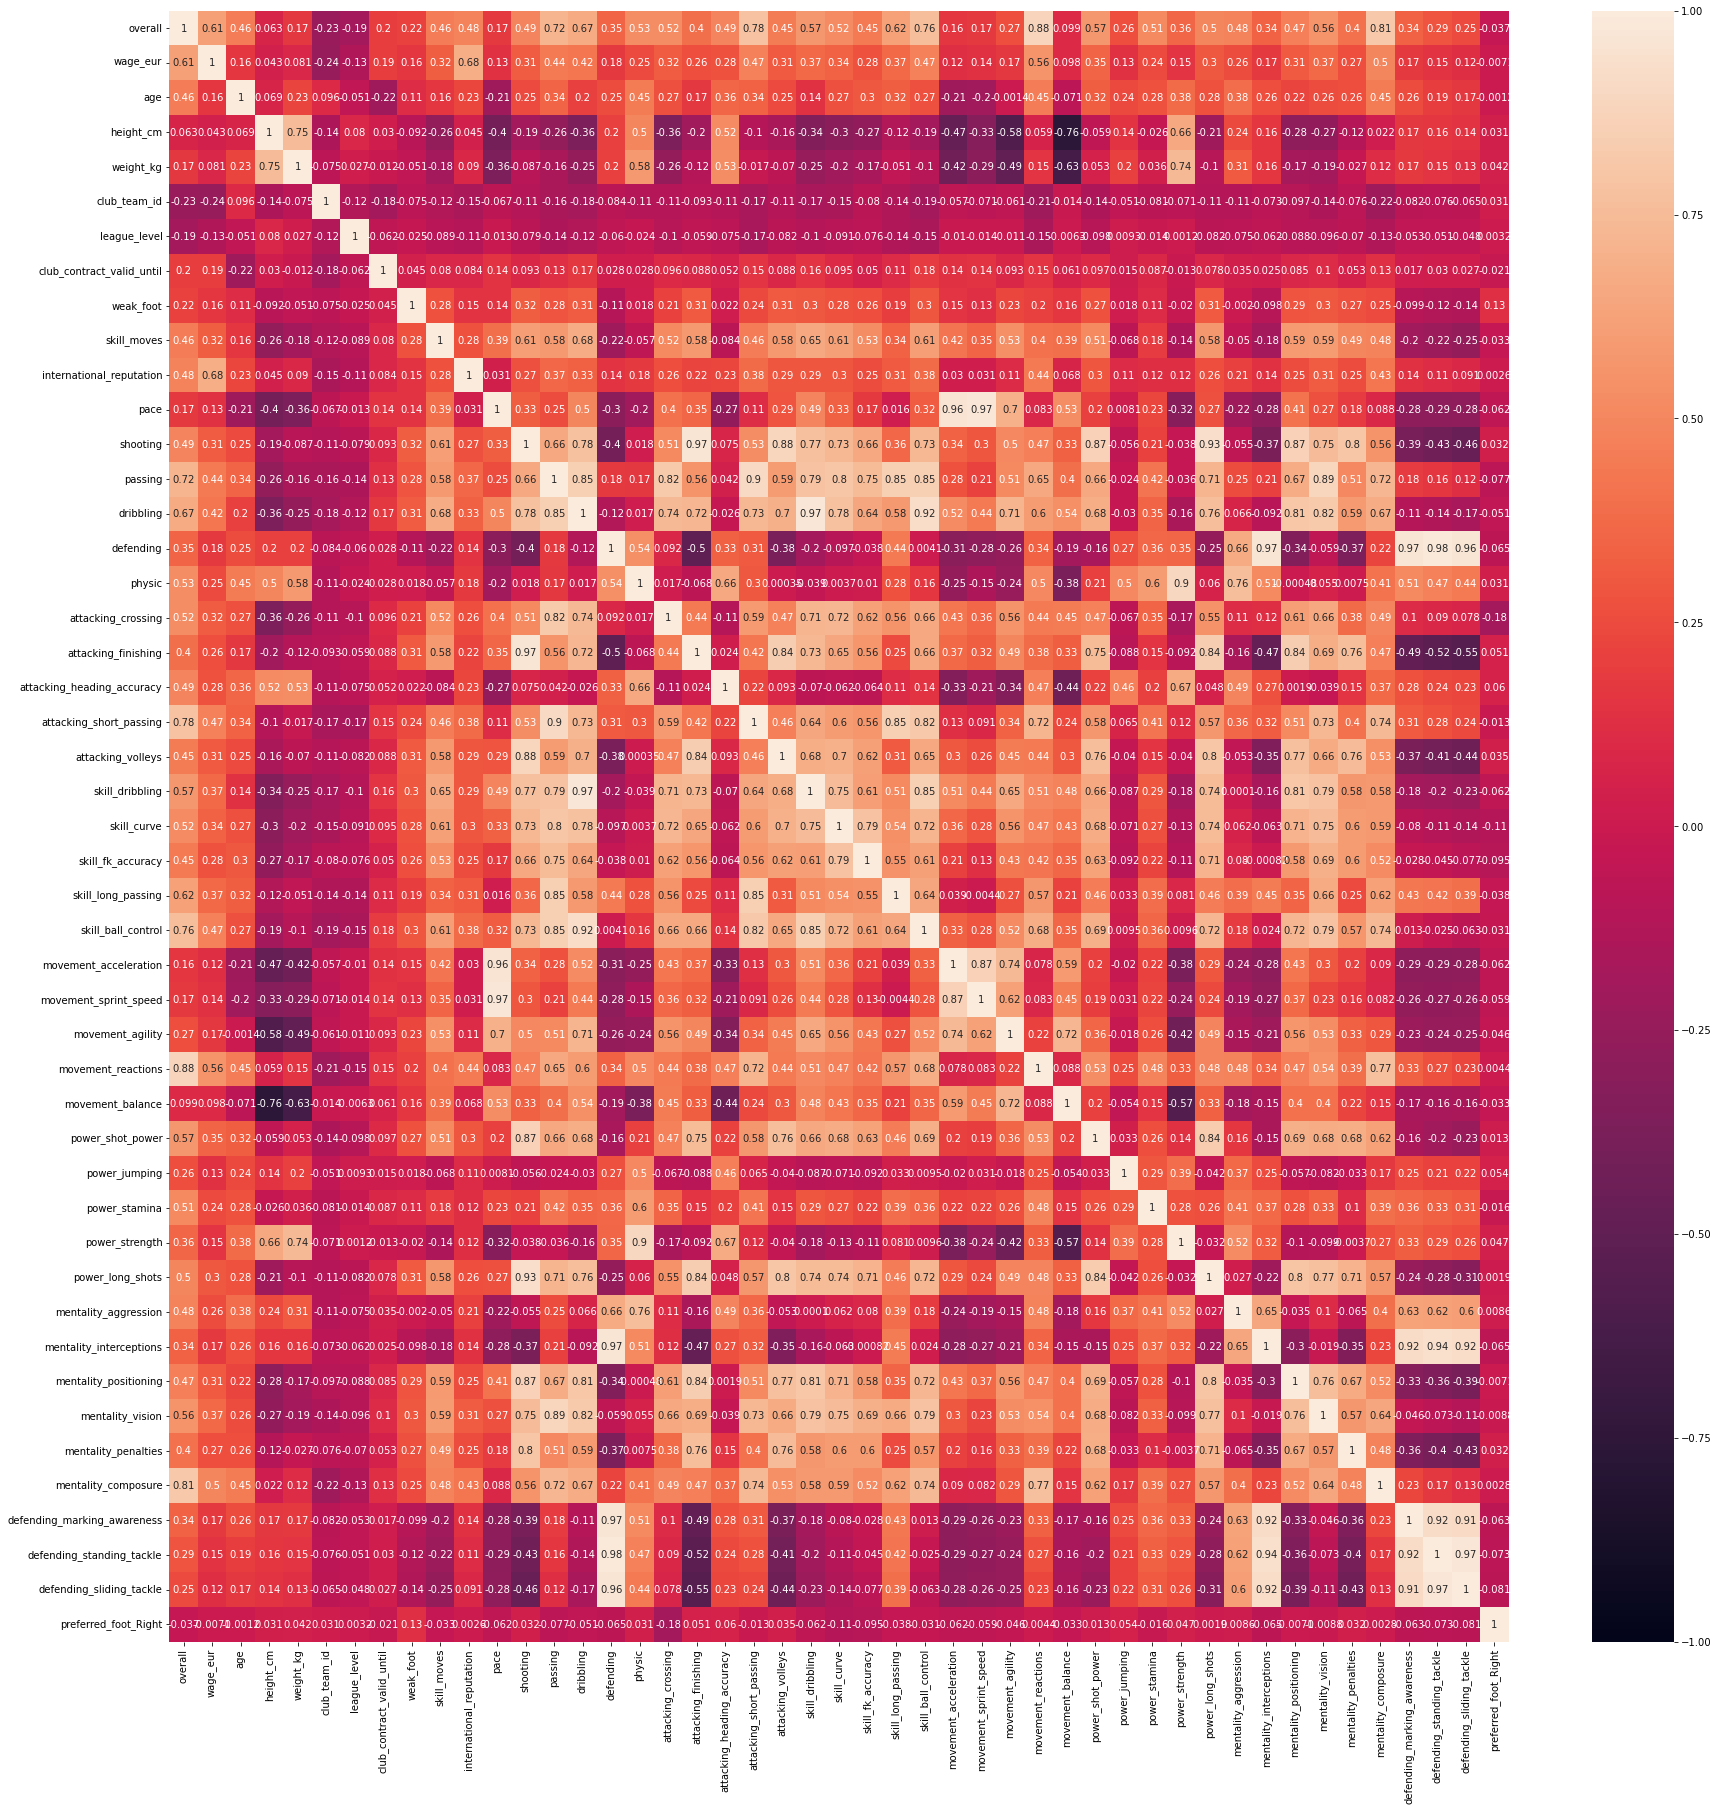

In [28]:
# Heatmap after remove some irrelated variables
plt.figure(figsize=(30,30))
sns.heatmap(df3.corr(), vmin=-1, annot = True);
# plt.xticks(rotation=90, fontsize=20)
# plt.yticks(rotation=360, fontsize=20)

## 1.3) Detect Outlier

In [29]:
#Use percentile to validate not qualified data
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df3.columns:
    replace_with_thresholds(df3, col)

## 1.4) Dividing the dataset into features and response

In [30]:
# Choose 'wage_eur' as target variable
X = df3.drop(['wage_eur','club_team_id'], axis=1)   #Dividing the dataset into features and response. 
y = df3['wage_eur']
X.shape

(16074, 45)

# 2) Data visualization of dataset

<Figure size 1440x1440 with 0 Axes>

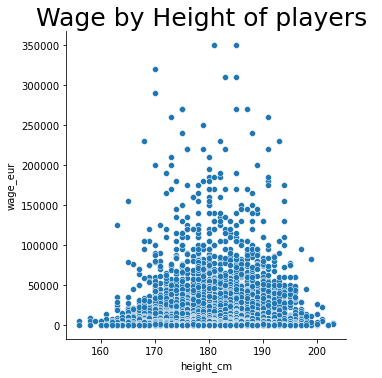

In [31]:
# relplot shows relationship between variables
plt.figure(figsize=(20,20))
sns.relplot(
    data=df2,
    y="wage_eur", x="height_cm", 
#     col="preferred_foot_Right"
)
plt.title("Wage by Height of players ", fontdict = {'fontsize' : 25})
plt.show()

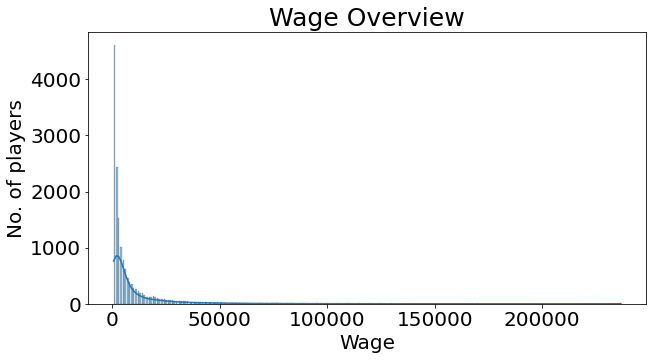

In [32]:
# check the distribution of overall score of payer
plt.figure(figsize=(10,5))
sns.histplot(data=df3, x="wage_eur", kde=True)
plt.title("Wage Overview" , fontdict = {'fontsize' : 25})
plt.xticks(fontsize=20)
plt.yticks( fontsize=20)
plt.ylabel('No. of players', fontsize=20)
plt.xlabel('Wage', fontsize=20)
plt.show()

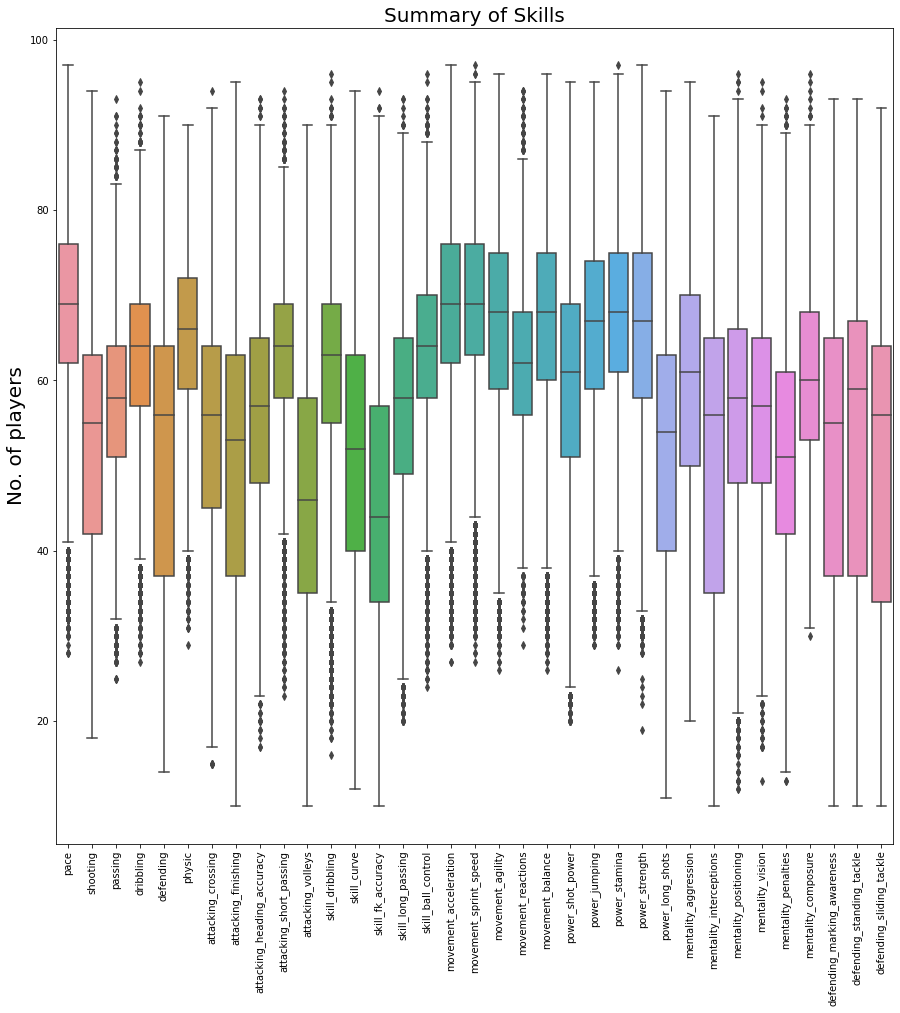

In [33]:
#Plot data without club_contract_valid_until (only skills)
plt.figure(figsize=(15,15))
X1 = df3.drop(['wage_eur','overall','club_team_id','age',
               'height_cm','weight_kg','league_level','weak_foot','skill_moves',
               'international_reputation','preferred_foot_Right','club_contract_valid_until'], axis=1)
y1 = df3['wage_eur']
sns.boxplot(data=X1)
plt.ylabel('No. of players', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=360, fontsize=10)
plt.title("Summary of Skills", fontdict = {'fontsize' : 20})
plt.show()

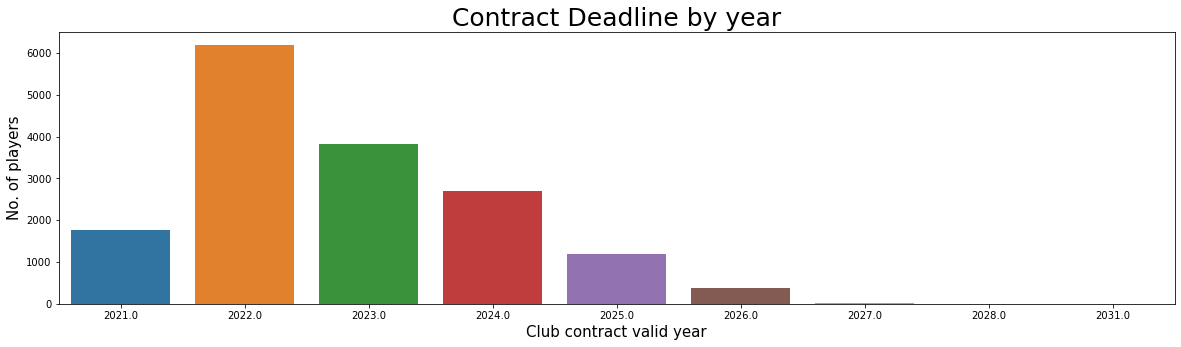

In [34]:
# Plot to see Contract Deadline by year
plt.figure(figsize=(20,5))
sns.countplot(x='club_contract_valid_until',data=df3)
plt.title("Contract Deadline by year", fontdict = {'fontsize' : 25})
plt.ylabel('No. of players', fontsize=15)
plt.xlabel('Club contract valid year', fontsize=15)
plt.show()

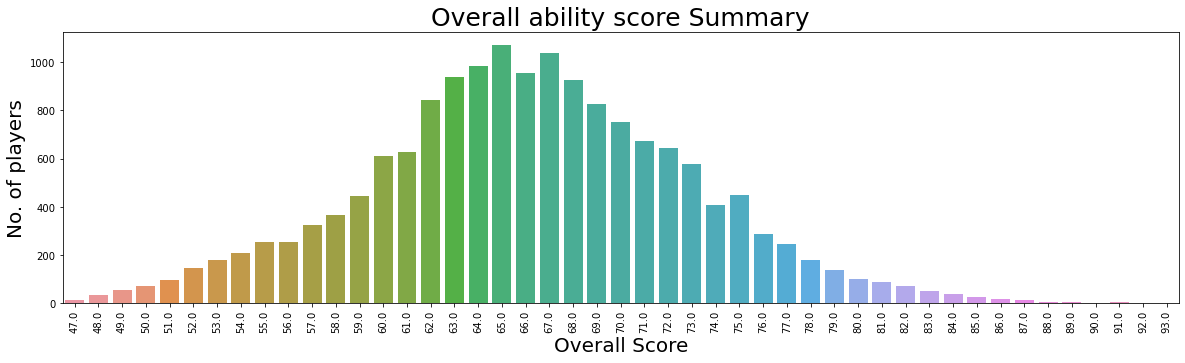

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(x='overall',data=df3)
plt.title("Overall ability score Summary", fontdict = {'fontsize' : 25})
plt.xlabel('Overall Score', fontsize=20)
plt.ylabel('No. of players', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=360, fontsize=10)
plt.show()

In [36]:
#Check wage overview 
df3.wage_eur.describe()

count     16074.000000
mean       9641.081871
std       19741.097111
min         500.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      236750.000000
Name: wage_eur, dtype: float64

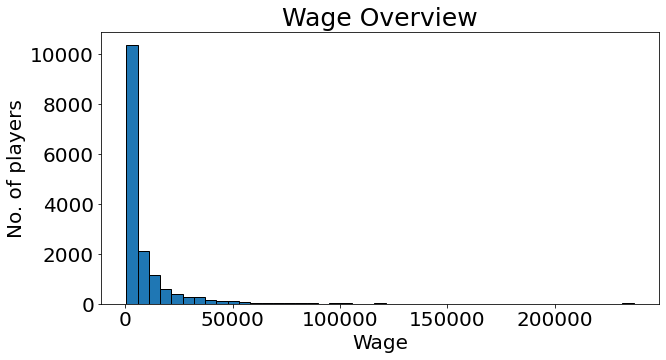

In [37]:
plt.figure(figsize=(10,5))
plt.hist(df3['wage_eur'], edgecolor='black', bins=int(45/1)) 
plt.ylabel('No. of players', fontsize=20)
plt.xlabel('Wage', fontsize=20)
plt.title('Wage Overview', fontdict = {'fontsize' : 25})
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.show()

<Figure size 1080x2520 with 0 Axes>

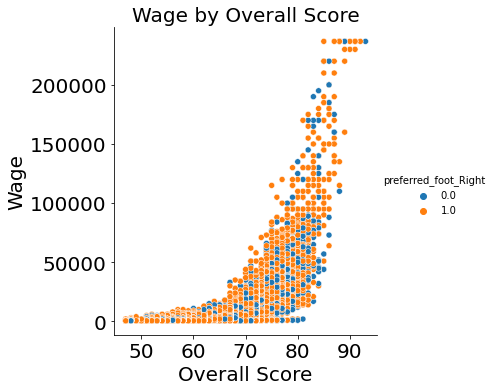

In [38]:
# relplot shows relationship between variables
plt.figure(figsize=(15,35))
sns.relplot(
    data=df3,
    y="wage_eur", x="overall", 
#     col="preferred_foot_Right",
    hue="preferred_foot_Right"
)
plt.title("Wage by Overall Score",fontdict = {'fontsize' : 20})
plt.xlabel('Overall Score', fontsize=20)
plt.ylabel('Wage', fontsize=20)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.show()

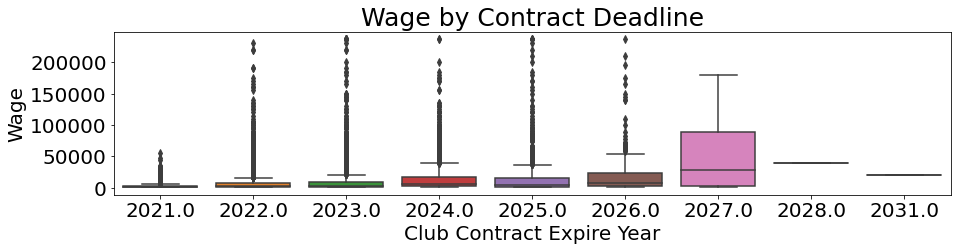

In [39]:
# BoxPlot of wage and club_contract_valid_until
plt.figure(figsize=(15,3))
sns.boxplot(x='club_contract_valid_until',
                y='wage_eur',
                data=df3)
plt.title("Wage by Contract Deadline",fontdict = {'fontsize' : 25})
plt.xlabel('Club Contract Expire Year', fontsize=20)
plt.ylabel('Wage', fontsize=20)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.show()


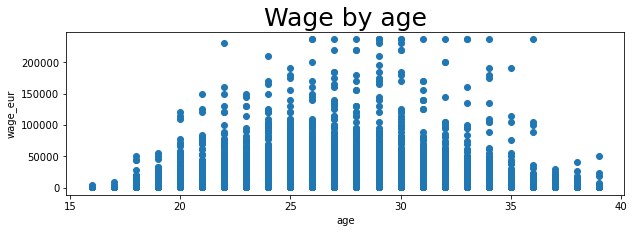

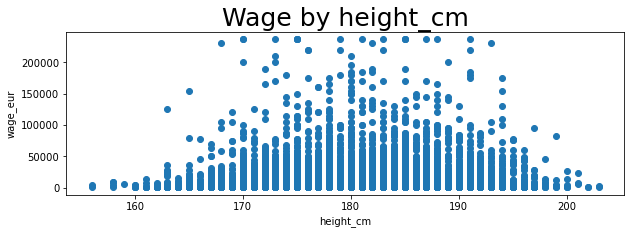

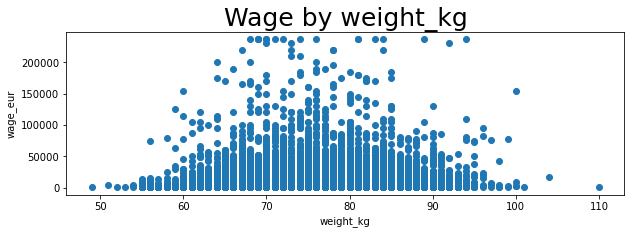

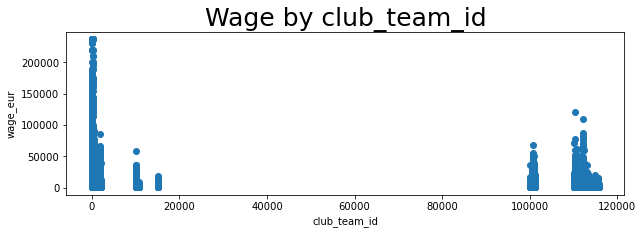

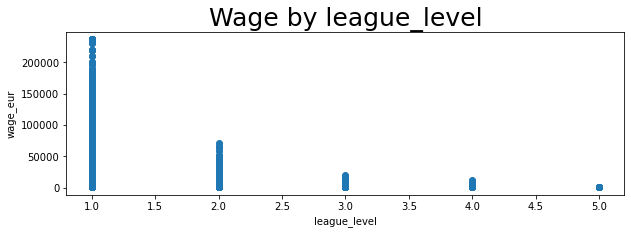

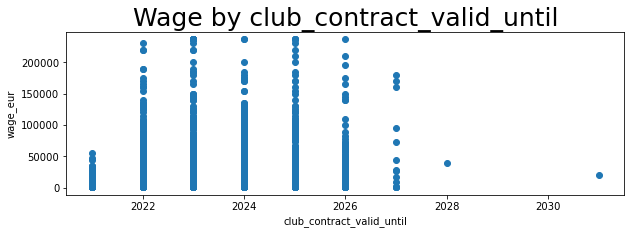

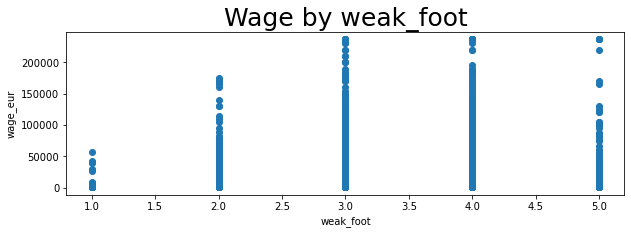

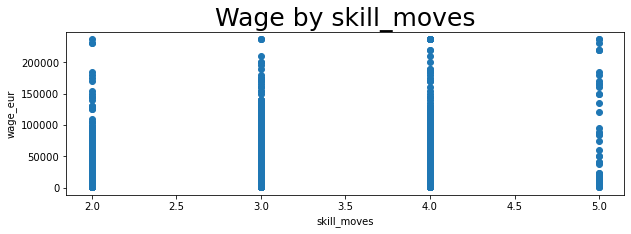

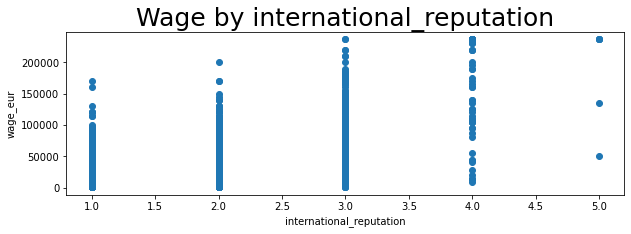

In [40]:
#Scatter plot some variables
for col in df3.columns[2:11]:
    plt.figure(figsize=(10,3))
    fig = plt.Figure()
    plt.scatter(df3[col], df3['wage_eur'])
    plt.xlabel(col)
    plt.ylabel('wage_eur')
    name = "Wage by " + col
    plt.title(name,fontdict = {'fontsize' : 25})
    plt.show()

### Evaluate distribution and asymmetry

In [41]:
print(f"Skewness of Wage: {df3['wage_eur'].skew()}")
print(f"Kurtosis of wage: {df3['wage_eur'].kurt()}")

Skewness of Wage: 5.565775806553566
Kurtosis of wage: 43.37283370443271


In [42]:
print(f"Skewness of Age: {df3['age'].skew()}")
print(f"Kurtosis of Age: {df3['age'].kurt()}")

Skewness of Age: 0.3591440059678368
Kurtosis of Age: -0.5878118144882549


In [43]:
print(f"Skewness of Height: {df3['height_cm'].skew()}")
print(f"Kurtosis of Height: {df3['height_cm'].kurt()}")

Skewness of Height: -0.024491893142823018
Kurtosis of Height: -0.264887219959443


In [44]:
print(f"Skewness of Weight: {df3['weight_kg'].skew()}")
print(f"Kurtosis of Weight: {df3['weight_kg'].kurt()}")

Skewness of Weight: 0.22512090743087776
Kurtosis of Weight: 0.12239928512067477


==> Wage, Age, Height, Weight follow norminal Distribution

# 3) Feature Selection

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [46]:
# !pip3 install xgboost

In [47]:
df3.shape

(16074, 47)

## 3.1) Feature Selection with AdaBoostRegressor

### 3.1.1) Feature Selection

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from numpy import array
from sklearn.metrics import accuracy_score

print("Feature data dimension: ", X.shape)

estimator = AdaBoostRegressor(random_state=10, n_estimators=50)
selector = SelectFromModel(estimator)
selector = selector.fit(X, y)

status = selector.get_support()
print("Selection status: ", status)

features = array(X.columns)

print("Selected features:")
print(features[status])
X_ada = selector.transform(X) 
print("Selected features shape: ",X_ada.shape)
   

Feature data dimension:  (16074, 45)
Selection status:  [ True  True False False False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False  True False  True False False False False False
 False False False False False False False False False]
Selected features:
['overall' 'age' 'international_reputation' 'skill_dribbling'
 'movement_reactions' 'power_shot_power']
Selected features shape:  (16074, 6)


### 3.1.2) Performance of AdaBoostRegressor

In [49]:
#Dividing the dataset into training and testing data samples
from sklearn.model_selection import train_test_split
X_train_ada, X_test_ada,y_train_ada, y_test_ada = train_test_split(X_ada,y, test_size = 0.2, random_state = 30)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

names = ["Linear","Logistic","Random forest","AdaBOOST","KNN","Decision Tree", "Gradient Booster"]
predScore=[]
kfold = KFold(n_splits=5, shuffle=True)
classifiers = [LinearRegression(),
               LogisticRegression(solver='liblinear', random_state=0),
               RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18),
               AdaBoostRegressor(random_state=10, n_estimators=50),
               KNeighborsRegressor(n_neighbors=3),
               DecisionTreeRegressor(max_depth=5),
               GradientBoostingRegressor()
              ]
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(X_train_ada, y_train_ada)   
    print(classifier)
    predScore.append(pipeline.predict(X_test_ada))
    mse = mean_squared_error(y_test_ada,pipeline.predict(X_test_ada))
    scores=cross_val_score(classifier, X_ada, y, cv=kfold)
    print("Average cross-validation score: {:.6f}".format(scores.mean()))  
    print("model score: %.6f" % pipeline.score(X_test_ada,y_test_ada))
    print("rmse: %.6f" % mse**0.5)
    print("\n -----------------------------------------------------------------------------------")

LinearRegression()
Average cross-validation score: 0.594845
model score: 0.609163
rmse: 13587.620956

 -----------------------------------------------------------------------------------
LogisticRegression(random_state=0, solver='liblinear')
Average cross-validation score: 0.175749
model score: 0.176672
rmse: 19037.886043

 -----------------------------------------------------------------------------------
RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)
Average cross-validation score: 0.771303
model score: 0.793395
rmse: 9879.059524

 -----------------------------------------------------------------------------------
AdaBoostRegressor(random_state=10)
Average cross-validation score: 0.704882
model score: 0.788350
rmse: 9998.957791

 -----------------------------------------------------------------------------------
KNeighborsRegressor(n_neighbors=3)
Average cross-validation score: 0.691428
model score: 0.733107
rmse: 1122

## 3.2) Feature Selection using Decision Tree Classifier

In [51]:
DC = SelectFromModel(DecisionTreeClassifier(max_depth=6))
DC.fit(X, y)
X_DC=DC.transform(X)
X_DC.shape

(16074, 4)

In [52]:
X_DC

array([[9.300e+01, 3.400e+01, 1.000e+00, 2.023e+03],
       [9.200e+01, 3.200e+01, 1.000e+00, 2.023e+03],
       [9.100e+01, 3.600e+01, 1.000e+00, 2.023e+03],
       ...,
       [4.700e+01, 2.100e+01, 1.000e+00, 2.021e+03],
       [4.700e+01, 1.900e+01, 1.000e+00, 2.021e+03],
       [4.700e+01, 1.900e+01, 1.000e+00, 2.025e+03]])

In [53]:
status_DC =DC.get_support(indices=True) 
status_DC

array([0, 1, 4, 5], dtype=int64)

In [54]:
features = array(X.columns)
print("Selected features:")
print(features[status_DC])
print("Selected features shape: ",X_DC.shape)

Selected features:
['overall' 'age' 'league_level' 'club_contract_valid_until']
Selected features shape:  (16074, 4)


In [55]:
from sklearn.model_selection import train_test_split
X_train_DC, X_test_DC,y_train_DC, y_test_DC = train_test_split(X_DC,y, test_size = 0.3, random_state = 30)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# import xgboost as xg
names = ["Linear","Logistic","Random forest","AdaBOOST","AdaBoost2","KNN","Decision Tree", "Gradient Booster","XGBoost"]
predScore=[]
kfold = KFold(n_splits=5, shuffle=True)
classifiers = [LinearRegression(),
               LogisticRegression(solver='liblinear', random_state=0),
               RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18),
               AdaBoostRegressor(random_state=10, n_estimators=50),
               KNeighborsRegressor(n_neighbors=3),
               DecisionTreeRegressor(max_depth=5),
               GradientBoostingRegressor()
              ]
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                    ('classifier', classifier)])
    pipeline.fit(X_train_DC, y_train_DC)   
    print(classifier)
    predScore.append(pipeline.predict(X_test_DC))
    mse = mean_squared_error(y_test_DC,pipeline.predict(X_test_DC))
    scores=cross_val_score(classifier, X_DC, y, cv=kfold)
#     print("Cross-validation scores:\n{}".format(cross_val_score(GBR, X_selected, y, cv=kfold)))
    print("Average cross-validation score: {:.6f}".format(scores.mean()))
#     acc = r2_score(y_test_ada, pipeline.predict(X_test_ada))      
#     print('Accuracy on testing data by Kfold is :%.6f' %  acc)   
    print("model score: %.6f" % pipeline.score(X_test_DC,y_test_DC))
    print("rmse: %.6f" % mse**0.5)
    print("\n -----------------------------------------------------------------------------------")

LinearRegression()
Average cross-validation score: 0.403414
model score: 0.402839
rmse: 16057.638616

 -----------------------------------------------------------------------------------
LogisticRegression(random_state=0, solver='liblinear')
Average cross-validation score: 0.173572
model score: 0.174373
rmse: 18441.594192

 -----------------------------------------------------------------------------------
RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)
Average cross-validation score: 0.755515
model score: 0.768518
rmse: 9997.569638

 -----------------------------------------------------------------------------------
AdaBoostRegressor(random_state=10)
Average cross-validation score: 0.717089
model score: 0.769128
rmse: 9984.385173

 -----------------------------------------------------------------------------------
KNeighborsRegressor(n_neighbors=3)
Average cross-validation score: 0.701114
model score: 0.723442
rmse: 1092

# 3.3) Feature Selection using Decision Tree Regressor

In [57]:
estimator_DT = DecisionTreeRegressor(max_depth=5)
selector_DT = SelectFromModel(estimator_DT)
selector_DT = selector_DT.fit(X, y)

status_DT = selector_DT.get_support()
print("Selection status: ", status_DT)

features_DT = array(X.columns)

print("Selected features:")
print(features_DT[status_DT])
X_DT = selector_DT.transform(X) 
print("Selected features shape: ",X_DT.shape)

Selection status:  [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
Selected features:
['overall']
Selected features shape:  (16074, 1)


### Check performance of models

In [58]:
from sklearn.model_selection import train_test_split
X_train_DT, X_test_DT,y_train_DT, y_test_DT = train_test_split(X_DT,y, test_size = 0.2, random_state = 30)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# import xgboost as xg
names = ["Linear","Logistic","Random forest","AdaBOOST","KNN","Decision Tree", "Gradient Booster"]
predScore=[]
kfold = KFold(n_splits=5, shuffle=True)
classifiers = [LinearRegression(),
               LogisticRegression(solver='liblinear', random_state=0),
               RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18),
               AdaBoostRegressor(random_state=10, n_estimators=50),
               KNeighborsRegressor(n_neighbors=3),
               DecisionTreeRegressor(max_depth=5),
               GradientBoostingRegressor()
              ]
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                       ('classifier', classifier)])
    pipeline.fit(X_train_DT, y_train_DT)   
    print(classifier)
    predScore.append(pipeline.predict(X_test_DT))
    mse = mean_squared_error(y_test_DT,pipeline.predict(X_test_DT))
    scores=cross_val_score(classifier, X_DT, y, cv=kfold)
    print("Average cross-validation score: {:.6f}".format(scores.mean())) 
    print("model score: %.6f" % pipeline.score(X_test_DT,y_test_DT))
    print("rmse: %.6f" % mse**0.5)
    print("\n -----------------------------------------------------------------------------------")

LinearRegression()
Average cross-validation score: 0.386438
model score: 0.383422
rmse: 17066.306098

 -----------------------------------------------------------------------------------
LogisticRegression(random_state=0, solver='liblinear')
Average cross-validation score: 0.171395
model score: 0.170451
rmse: 22722.643833

 -----------------------------------------------------------------------------------
RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)
Average cross-validation score: 0.765183
model score: 0.792975
rmse: 9889.111970

 -----------------------------------------------------------------------------------
AdaBoostRegressor(random_state=10)
Average cross-validation score: 0.750866
model score: 0.778166
rmse: 10236.691523

 -----------------------------------------------------------------------------------
KNeighborsRegressor(n_neighbors=3)
Average cross-validation score: 0.679442
model score: 0.762746
rmse: 105

## 3.4) Other Feature Selection

These mothods below choose more than 15 varables

### 3.4.1) Feature Selection using variance treshold

In [60]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.25)
vt.fit(X)
#VarianceThreshold(threshold=0.15)
X_VT = pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X.columns).T

In [61]:
X_VT.shape

(2, 45)

### 3.4.2) Feature Selection using Linear SVC

In [62]:
selector = SelectFromModel(estimator=LinearSVC(C=0.001,dual=False)).fit(X, y)
X_sel=selector.transform(X)
X_sel.shape

(16074, 15)

### 3.4.3) Feature Selection using Logistic Regression

In [63]:
method2 = SelectFromModel(estimator=LogisticRegression(max_iter=500)).fit(X, y)
X_method2=method2.transform(X)
X_method2.shape

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(16074, 26)

### 3.4.4) Feature Selection using RandomForestClassifier

In [64]:
RF = SelectFromModel(RandomForestClassifier(n_estimators = 100))
RF.fit(X, y)
X_RF=RF.transform(X)
X_RF.shape

(16074, 36)

# 4) Building models with the best feature selection methods

## 4.1) Predict using Decision Tree Classifier

### 4.1.2) Prepare data

In [65]:
#Get indexes of features choosen
status_DC =DC.get_support(indices=True) 
status_DC

array([0, 1, 4, 5], dtype=int64)

In [66]:
#Export features to file
X.iloc[:,[0, 1, 4, 5]].to_csv('fifa_features.csv',index=False)

In [67]:
#import the file
df_new =pd.read_csv('fifa_features.csv')     # reading new dataset 

In [68]:
#Check DataFrame
X_selected = df_new
df_new

overall   age  league_level  club_contract_valid_until
0         93.0  34.0           1.0                     2023.0
1         92.0  32.0           1.0                     2023.0
2         91.0  36.0           1.0                     2023.0
3         91.0  29.0           1.0                     2025.0
4         91.0  30.0           1.0                     2025.0
...        ...   ...           ...                        ...
16069     47.0  20.0           1.0                     2021.0
16070     47.0  22.0           1.0                     2021.0
16071     47.0  21.0           1.0                     2021.0
16072     47.0  19.0           1.0                     2021.0
16073     47.0  19.0           1.0                     2025.0

[16074 rows x 4 columns]

### 4.1.2) Buld Model

In [69]:
X_select = X_DC
gbr = GradientBoostingRegressor()
gbr.fit(X_train_DC, y_train_DC)
y_pred= gbr.predict(X_test_DC)

### 4.1.3) Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
cutoff = y_train_DC.mean()                          # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test_DC > cutoff] = 1
confusion_matrix(y_test_classes, y_pred_classes)

array([[3444,  227],
       [ 215,  937]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

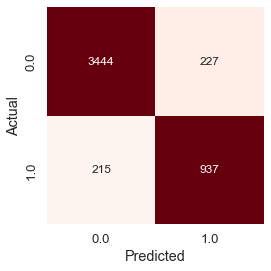

In [71]:
#Generate seaborn heatmap for the confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test_classes, y_pred_classes)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_classes), index = np.unique(y_test_classes))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

### 4.1.4) Classification Report

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3671
         1.0       0.80      0.81      0.81      1152

    accuracy                           0.91      4823
   macro avg       0.87      0.88      0.87      4823
weighted avg       0.91      0.91      0.91      4823



### 4.1.5) ROC Curve

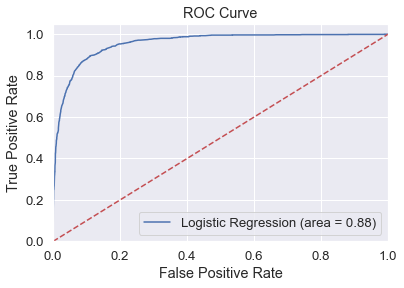

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test_classes, y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_test_classes, gbr.predict(X_test_DC).flatten())
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 4.1.6) Check the model accuracy

In [74]:
print("overall,age,league_level,club_contract_valid_until is what we need to predict Salary of a football player")

overall,age,league_level,club_contract_valid_until is what we need to predict Salary of a football player


In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
X1_train, X1_test, y1_train, y1_test = train_test_split(X_selected, y, random_state=42)
kfold = KFold(n_splits=5, shuffle=True)
GBR = Pipeline([("GBR",GradientBoostingRegressor())])
GBR.fit(X1_train, y1_train)
scores=cross_val_score(GBR, X_selected, y, cv=kfold)
print("Cross-validation scores:\n{}".format(cross_val_score(GBR, X_selected, y, cv=kfold)))
print("Average cross-validation score: {:.6f}".format(scores.mean()))
pred = GBR.predict(X1_test)
acc = r2_score(y1_test, pred)      
print('Accuracy on testing data is :', acc)   

Cross-validation scores:
[0.71619313 0.75855127 0.802955   0.79707097 0.77568144]
Average cross-validation score: 0.770587
Accuracy on testing data is : 0.7769872361242416


In [76]:
# Create describe table data for features
fifa_df = pd.DataFrame(X_selected.describe())
print(fifa_df)
y.describe()

            overall           age  league_level  club_contract_valid_until
count  16074.000000  16074.000000  16074.000000               16074.000000
mean      66.123243     25.130895      1.350317                2022.786923
std        6.782261      4.598525      0.737675                   1.214023
min       47.000000     16.000000      1.000000                2021.000000
25%       62.000000     21.000000      1.000000                2022.000000
50%       66.000000     25.000000      1.000000                2023.000000
75%       71.000000     29.000000      1.000000                2024.000000
max       93.000000     39.000000      5.000000                2031.000000


count     16074.000000
mean       9641.081871
std       19741.097111
min         500.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      236750.000000
Name: wage_eur, dtype: float64

### 4.1.7) Test the model

In [100]:
#Get 1 random sample in DataFrame to test
X_sample = df3.sample(n=1)
X_sample

overall  wage_eur   age  height_cm  weight_kg  club_team_id  \
10070     65.0    3000.0  22.0      185.0       70.0         472.0   

       league_level  club_contract_valid_until  weak_foot  skill_moves  ...  \
10070           2.0                     2022.0        3.0            3  ...   

       mentality_aggression  mentality_interceptions  mentality_positioning  \
10070                  58.0                       25                     62   

       mentality_vision  mentality_penalties  mentality_composure  \
10070              59.0                   62                 60.0   

       defending_marking_awareness  defending_standing_tackle  \
10070                           28                         34   

       defending_sliding_tackle  preferred_foot_Right  
10070                        31                   1.0  

[1 rows x 47 columns]

In [101]:
#Select suitable variables with the model to test
dff = X_sample[['overall','age','league_level','club_contract_valid_until']]
dff

overall   age  league_level  club_contract_valid_until
10070     65.0  22.0           2.0                     2022.0

In [102]:
# A data outside dataset to test
# dff = pd.DataFrame({'overall': [90],
#                    'age': [28],
#                    'league_level': [2],
#                    'club_contract_valid_until': [2022]})
# dff

In [103]:
# Predict wage for test data
y_pred1= GBR.predict(dff)
print("Predicted Wage is: $%.2f" % y_pred1) 

Predicted Wage is: $3472.94


In [104]:
y.describe()

count     16074.000000
mean       9641.081871
std       19741.097111
min         500.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      236750.000000
Name: wage_eur, dtype: float64

In [105]:
# Get data from initial dataset with selected variables 
m = df3[['overall','age','league_level','club_contract_valid_until','wage_eur' ]]
m

overall   age  league_level  club_contract_valid_until  wage_eur
0         93.0  34.0           1.0                     2023.0  236750.0
1         92.0  32.0           1.0                     2023.0  236750.0
2         91.0  36.0           1.0                     2023.0  236750.0
3         91.0  29.0           1.0                     2025.0  236750.0
4         91.0  30.0           1.0                     2025.0  236750.0
...        ...   ...           ...                        ...       ...
18140     47.0  20.0           1.0                     2021.0     500.0
18141     47.0  22.0           1.0                     2021.0    1000.0
18142     47.0  21.0           1.0                     2021.0     500.0
18143     47.0  19.0           1.0                     2021.0     500.0
18144     47.0  19.0           1.0                     2025.0     500.0

[16074 rows x 5 columns]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


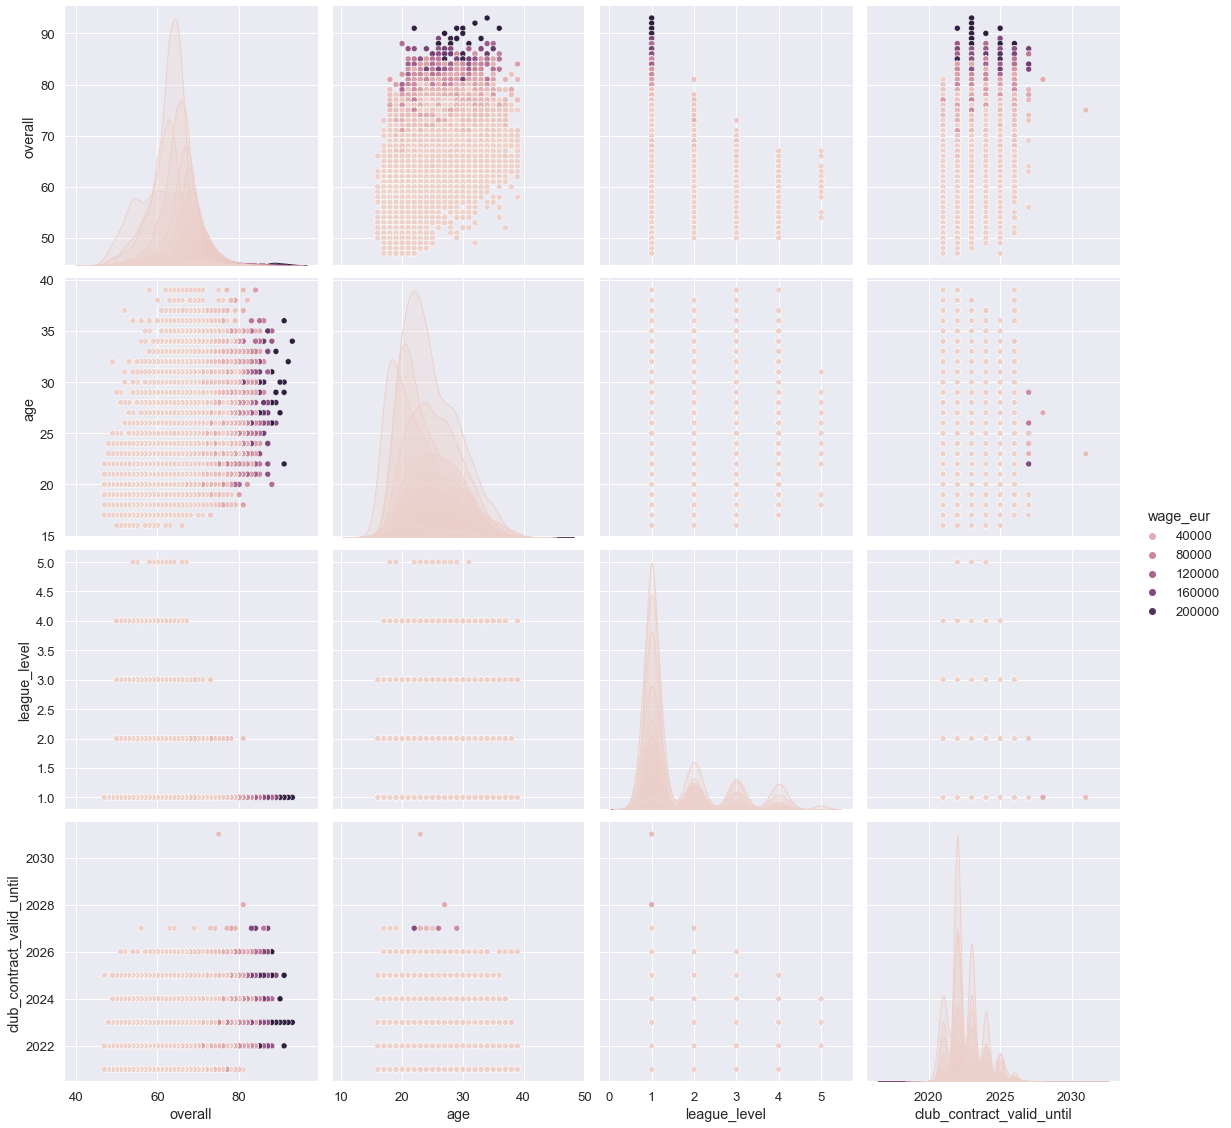

In [106]:
#Plot innitial data again to check if result of test is reasonable
sns.pairplot(df3[['overall','age','league_level','club_contract_valid_until','wage_eur' ]], hue='wage_eur', size=4)

## 4.2) Build models with CLASSIFICATION

## 4.2.1) Build Models

In [107]:
#first install xgboost
#!pip install xgboost 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

In [108]:
# Encoding y to groups for classification. Tried with different bins, and bins = 3 will return best result
X_class = X
y_class = y
cats, bins = pd.cut(y_class, 3, retbins=True)

#Print range of bins
cats

0        (158000.0, 236750.0]
1        (158000.0, 236750.0]
2        (158000.0, 236750.0]
3        (158000.0, 236750.0]
4        (158000.0, 236750.0]
                 ...         
18140       (263.75, 79250.0]
18141       (263.75, 79250.0]
18142       (263.75, 79250.0]
18143       (263.75, 79250.0]
18144       (263.75, 79250.0]
Name: wage_eur, Length: 16074, dtype: category
Categories (3, interval[float64, right]): [(263.75, 79250.0] < (79250.0, 158000.0] < (158000.0, 236750.0]]

In [109]:
# Count each bins
y_class.value_counts(bins = bins).sort_index()

(263.749, 79250.0]      15831
(79250.0, 158000.0]       184
(158000.0, 236750.0]       59
Name: wage_eur, dtype: int64

In [110]:
#Assign the bin to y
y_class = pd.cut(y, bins = bins, labels = False, include_lowest = True)
X_class

overall   age  height_cm  weight_kg  league_level  \
0         93.0  34.0      170.0       72.0           1.0   
1         92.0  32.0      185.0       81.0           1.0   
2         91.0  36.0      187.0       83.0           1.0   
3         91.0  29.0      175.0       68.0           1.0   
4         91.0  30.0      181.0       70.0           1.0   
...        ...   ...        ...        ...           ...   
18140     47.0  20.0      180.0       74.0           1.0   
18141     47.0  22.0      180.0       64.0           1.0   
18142     47.0  21.0      178.0       72.0           1.0   
18143     47.0  19.0      173.0       66.0           1.0   
18144     47.0  19.0      167.0       61.0           1.0   

       club_contract_valid_until  weak_foot  skill_moves  \
0                         2023.0        4.0            4   
1                         2023.0        4.0            4   
2                         2023.0        4.0            5   
3                         2025.0        5.0            5   
4                         2025.0        5.0            4   
...                          ...        ...          ...   
18140                     2021.0        3.0            2   
18141                     2021.0        3.0            2   
18142                     2021.0        3.0            2   
18143                     2021.0        3.0            2   
18144                     2025.0        3.0            2   

       international_reputation  pace  ...  mentality_aggression  \
0                             5  85.0  ...                  44.0   
1                             5  78.0  ...                  81.0   
2                             5  87.0  ...                  63.0   
3                             5  91.0  ...                  63.0   
4                             4  76.0  ...                  76.0   
...                         ...   ...  ...                   ...   
18140                         1  65.0  ...                  47.0   
18141                         1  58.0  ...                  52.0   
18142                         1  60.0  ...                  51.0   
18143                         1  68.0  ...                  34.0   
18144                         1  68.0  ...                  55.0   

       mentality_interceptions  mentality_positioning  mentality_vision  \
0                           40                     93              95.0   
1                           49                     95              81.0   
2                           29                     95              76.0   
3                           37                     86              90.0   
4                           66                     88              94.0   
...                        ...                    ...               ...   
18140                       32                     49              47.0   
18141                       42                     38              43.0   
18142                       38                     45              46.0   
18143                       14                     47              40.0   
18144                       42                     47              46.0   

       mentality_penalties  mentality_composure  defending_marking_awareness  \
0                       75                 96.0                           20   
1                       90                 88.0                           35   
2                       88                 95.0                           24   
3                       93                 93.0                           35   
4                       83                 89.0                           68   
...                    ...                  ...                          ...   
18140                   32                 43.0                           37   
18141                   42                 37.0                           38   
18142                   39                 36.0                           38   
18143                   49                 47.0

In [111]:
#Devide to train and split set
from sklearn.model_selection import train_test_split
X_train_c, X_test_c,y_train_c, y_test_c = train_test_split(X_class,y_class, test_size = 0.2, random_state = 30)

In [112]:
#Names of the various classification approaches for easy presentation of the results
import sklearn as sk
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neural_network import MLPClassifier
names = ["Logististic Regression 1","Logististic Regression 2",  "Linear SVC_1","Linear SVC_2", "RBF SVM",          
         "Random Forest", "Naive Bayes","MLP"]

scores = [] #list variable to hold classification scores

classifiers = [
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'),
    LogisticRegression(solver='liblinear', random_state=0),
    SVC(kernel='linear', C=0.025),
    SVC(gamma=2, C=1),
    svm.LinearSVC(),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
    GaussianNB(),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
]

for classifier in classifiers:
    pipeline = Pipeline(steps=[
       ('classifier', classifier)
    ])
    pipeline.fit(X_train_c, y_train_c)
    print(classifier)
    scores.append(pipeline.score(X_test_c, y_test_c))
    print("model score: %.6f" % pipeline.score(X_test_c, y_test_c))
    print("\n ---------------------------------")

scores_df = pd.DataFrame(zip(names, scores), columns=['Classfier', 'Accuracy'])
print(scores_df)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', random_state=0)
model score: 0.985381

 ---------------------------------
LogisticRegression(random_state=0, solver='liblinear')
model score: 0.986314

 ---------------------------------
SVC(C=0.025, kernel='linear')
model score: 0.985070

 ---------------------------------
SVC(C=1, gamma=2)
model score: 0.981337

 ---------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()
model score: 0.985070

 ---------------------------------
RandomForestClassifier(max_depth=2, random_state=0)
model score: 0.981337

 ---------------------------------
GaussianNB()
model score: 0.889269

 ---------------------------------
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')
model score: 0.981337

 ---------------------------------
                  Classfier  Accuracy
0  Logististic Regression 1  0.985381
1  Logististic Regression 2  0.986314
2              Linear SVC_1  0.985070
3              Linear SVC_2  0.981337
4                   RBF SVM  0.985070
5             Random Forest  0.981337
6               Naive Bayes  0.889269
7                       MLP  0.981337


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 4.2.2) Predict using classification - Logististic Regression

### A) Buld Model

In [90]:
from sklearn.metrics import accuracy_score
LRC = LogisticRegression(solver='liblinear', random_state=0)
LRC.fit(X_train_c, y_train_c)
y_pred_lrc= LRC.predict(X_test_c)
acc_score = round(accuracy_score(y_test_c, y_pred_lrc)*100,2)
print("Accuracy score: ", acc_score)

Accuracy score:  98.63


### B) Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_c, y_pred_lrc)

print(cf_matrix)

[[3152    3    0]
 [  28   13    4]
 [   1    8    6]]


In [92]:
# Set some thresholds to group data
from sklearn.metrics import confusion_matrix
cutoff1 = y_train_c.mean()                          # decide on a cutoff limit
y_pred_classes1 = np.zeros_like(y_pred_lrc)    # initialise a matrix full with zeros
y_pred_classes1[y_pred_lrc > cutoff1] = 1       # add a 1 if the cutoff was breached
y_test_classes1 = np.zeros_like(y_pred_lrc)
y_test_classes1[y_test_c > cutoff1] = 1
cf_matrix = confusion_matrix(y_test_classes1, y_pred_classes1)
cf_matrix

array([[3152,    3],
       [  29,   31]], dtype=int64)

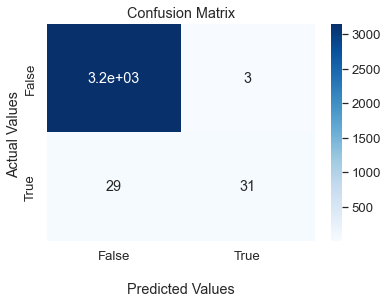

In [93]:
#Plot confusion matrix
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### C) Classification Report

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes1, y_pred_classes1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3155
           1       0.91      0.52      0.66        60

    accuracy                           0.99      3215
   macro avg       0.95      0.76      0.83      3215
weighted avg       0.99      0.99      0.99      3215



### D) ROC Curve

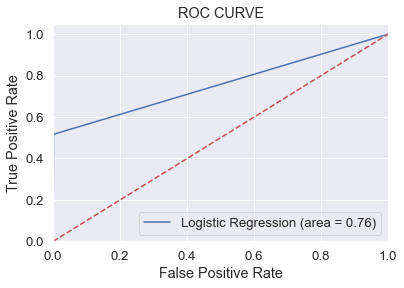

In [116]:
### 4.1.5) ROC Curvefrom sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test_classes1, y_pred_classes1)
fpr, tpr, thresholds = roc_curve(y_test_classes1, LRC.predict(X_test_c).flatten())
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## E) Test the model 

In [113]:
#Use the same test data above
X_sample

overall  wage_eur   age  height_cm  weight_kg  club_team_id  \
10070     65.0    3000.0  22.0      185.0       70.0         472.0   

       league_level  club_contract_valid_until  weak_foot  skill_moves  ...  \
10070           2.0                     2022.0        3.0            3  ...   

       mentality_aggression  mentality_interceptions  mentality_positioning  \
10070                  58.0                       25                     62   

       mentality_vision  mentality_penalties  mentality_composure  \
10070              59.0                   62                 60.0   

       defending_marking_awareness  defending_standing_tackle  \
10070                           28                         34   

       defending_sliding_tackle  preferred_foot_Right  
10070                        31                   1.0  

[1 rows x 47 columns]

In [114]:
#Get random sample in DataFrame to test
X_sample=X_sample.drop(['wage_eur','club_team_id'], axis=1)

In [115]:
y_pred_sample= LRC.predict(X_sample)
print("Predicted index is: %.2f" % y_pred_sample)
if (y_pred_sample == 0):
    print("Predicted Wage Range is: $263.749 - $79250.0")
elif (y_pred_sample == 1):
    print("Predicted Wage Range is: $79250.0 - $158000.0")
else:
    print("Predicted Wage Range is: $158000.0 - $236750.0")

Predicted index is: 0.00
Predicted Wage Range is: $263.749 - $79250.0
